In [12]:
## Import things

import batman
import math
import numpy as np
import matplotlib.pyplot as plt
from zachopy import oned as bin

In [13]:
## Read in data
x, y, yerr = np.genfromtxt('../data/MEarth_186.dat',
             dtype=None, delimiter=',',
             unpack=True, usecols=(0,1,2))

x = np.asarray(x, dtype=float)
y = np.asarray(y, dtype=float)
yerr = np.asarray(yerr, dtype=float)

m = np.isfinite(x) & np.isfinite(y) & np.isfinite(yerr)
x = x[m]
y = y[m]
yerr = yerr[m]

print x, type(x), type(x[1]), len(x)
print y, type(y), type(y[1]), len(y)
#print yerr, type(yerr[1])
        
y = np.power(10, y/-2.5)
yerr = y*yerr/-2.5*np.log(10)

##Filter outliers -- use nanmean and nanstd instead of cutting out NaN values
for i in range(0,2):
    std = np.nanstd(y)
    avg = np.nanmean(y)
    print avg, std
    
    ind = 0
    check = np.ones(len(x), dtype = bool)
    for m in y:
        if m>=(avg + (3*std)) or m<=(avg - (3*std)):
            check[ind] = False
            #print 'scratch'
        else: 
            check[ind] = True
        ind+=1
    x = x[check]
    y = y[check]
    yerr = yerr[check]


[2457710.63841689 2457710.6394672  2457710.64051522 ... 2457710.82976559
 2457710.830729   2457710.83169751] <type 'numpy.ndarray'> <type 'numpy.float64'> 1618
[-0.001085 -0.003962 -0.004546 ...  0.004697  0.006757  0.007061] <type 'numpy.ndarray'> <type 'numpy.float64'> 1618
1.0001210046902138 0.009815152968088176
0.9997276422437178 0.006459227425477771


In [14]:
## Plan plots
def make_plots(x, y, yerr, params, myt0, ecc, w):
    plt.close()
    params.ecc = ecc[0]
    params.w = w[0]
    t = np.linspace(myt0-0.2, myt0+0.2, 1000)
    m = batman.TransitModel(params, t)
    flux = m.light_curve(params)
    bt, by, bye = bin.binto(x=((x-myt0)*24), y=y, yuncertainty=yerr, binwidth=.02) 

    # Four subplots, row and column sharing
    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
    ax1.errorbar(bt, by, bye, fmt='o', c='k', alpha=0.6, zorder=0)
    ax1.plot((t-myt0)*24, flux, c='r', alpha = .7, linewidth=3, zorder = 10) 
    ax1.set_title(label = 'Ecc: '+ str(params.ecc) +', w: '+ str(params.w), verticalalignment='top')
    ax1.set_xlim(-1.5,1.5)

    params.ecc = ecc[1]
    params.w = w[1]
    m = batman.TransitModel(params, t)
    flux = m.light_curve(params)

    ax2.errorbar(bt, by, bye, fmt='o', c='k', alpha=0.6, zorder=0)
    ax2.plot((t-myt0)*24, flux, c='r', alpha = .7, linewidth=3, zorder = 10) 
    ax2.set_title(label = 'Ecc: '+ str(params.ecc) +', w: '+ str(params.w), verticalalignment='top')
    ax2.set_xlim(-1.5,1.5)

    params.ecc = ecc[2]
    params.w = w[2]
    m = batman.TransitModel(params, t)
    flux = m.light_curve(params)

    ax3.errorbar(bt, by, bye, fmt='o', c='k', alpha=0.6, zorder=0)
    ax3.plot((t-myt0)*24, flux, c='r', alpha = .7, linewidth=3, zorder = 10) 
    ax3.set_title(label = 'Ecc: '+ str(params.ecc) +', w: '+ str(params.w), verticalalignment='top')
    ax3.set_xlim(-1.5,1.5)

    params.ecc = ecc[3]
    params.w = w[3]
    m = batman.TransitModel(params, t)
    flux = m.light_curve(params)

    ax4.errorbar(bt, by, bye, fmt='o', c='k', alpha=0.6, zorder=0)
    ax4.plot((t-myt0)*24, flux, c='r', alpha = .7, linewidth=3, zorder = 10) 
    ax4.set_title(label = 'Ecc: '+ str(params.ecc) +', w: '+ str(params.w), verticalalignment='top')
    ax4.set_xlim(-1.5,1.5)
    
    params.ecc = ecc[4]
    params.w = w[4]
    m = batman.TransitModel(params, t)
    flux = m.light_curve(params)

    ax5.errorbar(bt, by, bye, fmt='o', c='k', alpha=0.6, zorder=0)
    ax5.plot((t-myt0)*24, flux, c='r', alpha = .7, linewidth=3, zorder = 10) 
    ax5.set_title(label = 'Ecc: '+ str(params.ecc) +', w: '+ str(params.w), verticalalignment='top')
    ax5.set_xlim(-1.5,1.5)
    
    params.ecc = ecc[5]
    params.w = w[5]
    m = batman.TransitModel(params, t)
    flux = m.light_curve(params)

    ax6.errorbar(bt, by, bye, fmt='o', c='k', alpha=0.6, zorder=0)
    ax6.plot((t-myt0)*24, flux, c='r', alpha = .7, linewidth=3, zorder = 10) 
    ax6.set_title(label = 'Ecc: '+ str(params.ecc) +', w: '+ str(params.w), verticalalignment='top')
    ax6.set_xlim(-1.5,1.5)

    f.suptitle('Example transits of K2-25b with best fit', fontsize=16)
    f.set_figwidth(15)
    #f.set_xlabel('Time from mid-transit')
    #f.set_ylabel('Flux relative to baseline')

    # Fine-tune figure; make subplots close to each other and hide x ticks for
    # all but bottom plot.
    f.subplots_adjust(hspace=0)
    #plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

    plt.show()
    f.savefig('/Users/X-phile/Dropbox/k225_transits/plots/eccw_check')

In [23]:
## Create range of example values
ecc = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
w = [-90, 0, 90, 180, 270, 360]
print ecc
print w

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[-90, 0, 90, 180, 270, 360]


In [24]:
## Initialize batman using that range
params = batman.TransitParams()

params.t0 = 2457062.57964  
params.per = 3.484564    
params.rp = 0.1        
params.a = 21.8  
impact = 0.55
inclin = math.acos(impact/params.a)*180./math.pi
params.inc = inclin               
params.ecc = ecc[0]                     
params.w = w[0]                       #longitude of periastron (in degrees)
params.u = [0.3, 0.6]  
params.limb_dark = "quadratic" 

numtransits = round((x[0]-params.t0)/params.per)
myt0 = params.t0 + params.per*numtransits
print myt0

2457710.70854


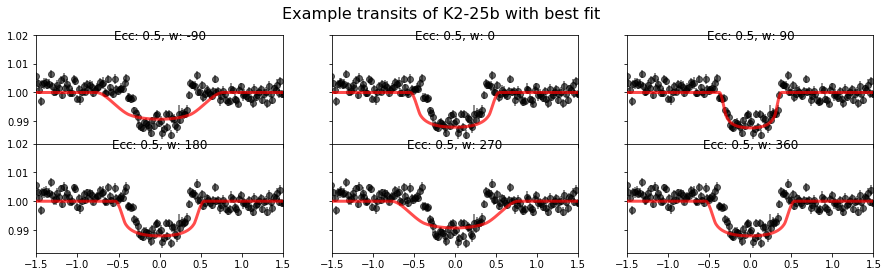

In [25]:
## Make plots
make_plots(x, y, yerr, params, myt0, ecc, w)

In [26]:
## Create range of example values
ecc = [0, .1, .2, .5, .7, .9]
w = [90, 90, 90, 90, 90, 90]
print ecc
print w

[0, 0.1, 0.2, 0.5, 0.7, 0.9]
[90, 90, 90, 90, 90, 90]


In [27]:
## Initialize batman using that range
params = batman.TransitParams()

params.t0 = 2457062.57964  
params.per = 3.484564    
params.rp = 0.1        
params.a = 21.8  
impact = 0.55
inclin = math.acos(impact/params.a)*180./math.pi
params.inc = inclin               
params.ecc = ecc[0]                     
params.w = w[0]                       #longitude of periastron (in degrees)
params.u = [0.3, 0.6]  
params.limb_dark = "quadratic" 

numtransits = round((x[0]-params.t0)/params.per)
myt0 = params.t0 + params.per*numtransits
print myt0

2457710.70854


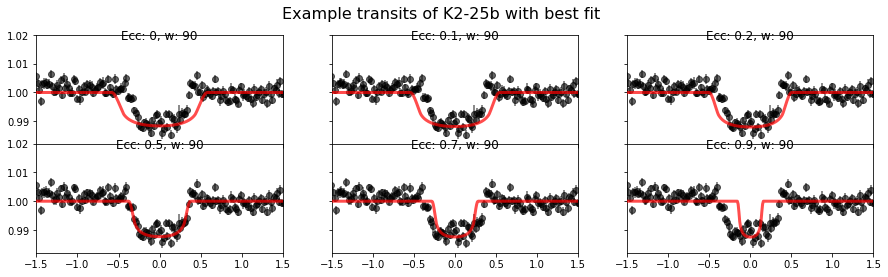

In [28]:
## Make plots
make_plots(x, y, yerr, params, myt0, ecc, w)